<a href="https://colab.research.google.com/github/RuslanAvtobot/IT_volonteer/blob/main/word_analize_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np

from tqdm import tqdm

tqdm.pandas()

In [92]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
df = pd.read_csv('/content/drive/MyDrive/Хакатон_IT_Volonteer/data/data_marked.csv')

In [95]:
vc = {0: 'Отрицательный твит', 1: 'Нейтральный твит', 2: 'Положительный твит'}

In [96]:
df['twet_context'] = df['rating'].map(vc)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1762 non-null   int64 
 1   date            1762 non-null   object
 2   username        1762 non-null   object
 3   tweet           1762 non-null   object
 4   replies_count   1762 non-null   int64 
 5   retweets_count  1762 non-null   int64 
 6   likes_count     1762 non-null   int64 
 7   hashtags        1762 non-null   object
 8   fond_name       1762 non-null   object
 9   rating          1762 non-null   int64 
 10  twet_context    1762 non-null   object
dtypes: int64(5), object(6)
memory usage: 151.5+ KB


In [98]:
df.sample(4)

,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name,rating,twet_context
1642,1539600611217481984,2022-06-22,jetsam729,Подари Жизнь БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОМОЩИ БЕЗ...,0,0,0,[],"""Подари жизнь""",2,Положительный твит
1559,1472156435618225920,2021-12-18,chslovoru,100 миллионов пока неизвестно на что 100 милли...,0,0,0,[],Фонд Потанина,1,Нейтральный твит
1561,1470290400518675968,2021-12-13,emrzngowog,Оренбургский фонд «Евразия» получит грант Влад...,0,0,0,[],Фонд Потанина,2,Положительный твит
515,897007642488446976,2017-08-14,fondnoosfera,"Фонд поддержки образования ""НООСФЕРА"" выражает...",0,0,0,[],"""Ноосфера""",1,Нейтральный твит


In [99]:
df[df['id'] == '']

,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name,rating,twet_context


In [100]:
import pymorphy2

In [101]:
morph = pymorphy2.MorphAnalyzer()

In [102]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [103]:
spec_chars = string.punctuation + '«' + '»' + '—' #добавление доп спец симловов к базовым
print(spec_chars)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~«»—


Убираем спец символы

In [104]:
def rem_spec_chars(x):
  x = "".join([ch for ch in x if ch not in spec_chars])
  return x

In [105]:
df['tweet_lem'] = df['tweet'].progress_apply(rem_spec_chars)

100%|██████████| 1762/1762 [00:00<00:00, 29920.38it/s]


Подгтовка текста, перевод всех букв в нижний регистр

In [106]:
def low(x):
  x = list(x.split())
  x = [w.lower() for w in x]
  return x

In [107]:
df['tweet_lem'] = df['tweet_lem'].progress_apply(low)

100%|██████████| 1762/1762 [00:00<00:00, 69248.09it/s]


Лематизация текста

In [108]:
def lem(x):
    #x = list(x.split())
    x = [morph.parse(w)[0].normal_form for w in x]
    return x

In [109]:
df['tweet_lem'] = df['tweet_lem'].progress_apply(lem)

100%|██████████| 1762/1762 [00:23<00:00, 75.79it/s]


In [110]:
df.sample(4)

,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name,rating,twet_context,tweet_lem
351,1299338982736749056,2020-08-28,onexim_group,Фестиваль «Территория» объявил программу! ...,0,0,0,[],Фонд Прохорова,1,Нейтральный твит,"[фестиваль, территория, объявить, программа, ф..."
504,956485071648763904,2018-01-25,fondnoosfera,"Фонд ""Ноосфера"" в рамках VI Рождественских пар...",0,0,0,[],"""Ноосфера""",1,Нейтральный твит,"[фонд, ноосфера, в, рамка, vi, рождественский,..."
567,679933049312641024,2015-12-24,uralfondnb,Будьте счастливы! #НашеБудущее #Реабелитация #...,0,0,0,"['нашебудущее', 'реабелитация', 'екатеринбург'...","""Наше будущее""",2,Положительный твит,"[быть, счастливый, нашебудущий, реабелитация, ..."
1678,1519770121459453952,2022-04-28,ld_tole,Дебиторская задолженность фонда «Подари жизнь»...,0,0,0,[],"""Подари жизнь""",0,Отрицательный твит,"[дебиторский, задолженность, фонд, подарить, ж..."


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1762 non-null   int64 
 1   date            1762 non-null   object
 2   username        1762 non-null   object
 3   tweet           1762 non-null   object
 4   replies_count   1762 non-null   int64 
 5   retweets_count  1762 non-null   int64 
 6   likes_count     1762 non-null   int64 
 7   hashtags        1762 non-null   object
 8   fond_name       1762 non-null   object
 9   rating          1762 non-null   int64 
 10  twet_context    1762 non-null   object
 11  tweet_lem       1762 non-null   object
dtypes: int64(5), object(7)
memory usage: 165.3+ KB


Убираем стоп-слова

In [112]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

К стоп словам добавляем все слова которые в нашем контексте не несут смысловой нагрузки. Т.е. убираем слово "фонд" т.к. мы знаем что мы анализируем фонды и это слово будет постоянно встечаться.

In [114]:
russian_stopwords.extend(['фонд', 'благотворительный', 'абсолют-помощь', 'агат', 'базис', 'дар',
                          'хамовник', 'искусство', 'наука', 'спорт', 'прохоров', 'михаил', 'мпрохоров', 'м',
                          'мельниченко', 'андрей', 'муслим', 'магомаев', 'ноосфера', 'наш', 'нашебудущий', 
                          'будущее', 'рыбаковфонд', 'рыбак', 'сафмара', 'свет', 'дерипаск', 'олег', 
                          'вольный', 'дело', 'тимченко', 'геннадий', 'благотворительный', 'елена',
                          'жизнь', 'фонд', 'подарить', 'хаматовый', 'чулпан', 'актриса', 
                          'потанин', 'владимир', 'фондпотанин', 'фондмихаилапрохоров', 'абсолютпомощь',
                          'это', 'год', 'і', 'iii', 'алишер', 'усманов', 'который', 'фондтимченко', 'инс',
                          '12', 'всё'])

In [115]:
english_stopwords = stopwords.words("english")

In [116]:
def stop_words(x):
  new_x = []
  for w in x:
    if w not in russian_stopwords:
      if w not in english_stopwords:
        new_x.append(w)
  return new_x

In [117]:
df['tweet_lem'] = df['tweet_lem'].progress_apply(stop_words)

100%|██████████| 1762/1762 [00:00<00:00, 4562.09it/s]


In [118]:
df[df['id'] == 1437690361858641923].tweet_lem

Series([], Name: tweet_lem, dtype: object)

In [119]:
df.sample(4)

,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name,rating,twet_context,tweet_lem
558,687529261696217088,2016-01-14,uralfondnb,#НашеБудущее #Реабилитация #Наркомания #Алкого...,0,0,0,"['нашебудущее', 'реабилитация', 'наркомания', ...","""Наше будущее""",1,Нейтральный твит,"[реабилитация, наркомания, алкоголизм, мотивац..."
338,1356571871609822976,2021-02-02,onexim_group,Через несколько часов открываем финальные деба...,0,0,0,[],Фонд Прохорова,1,Нейтральный твит,"[несколько, час, открывать, финальный, дебаты,..."
1457,1113186877098536960,2019-04-02,raspleskcinema,"Мастер-класс\Пластика, сценическое движение\0...",0,0,0,['тюмень'],Фонд Тимченко,2,Положительный твит,"[мастеркласспластика, сценический, движение0₽,..."
180,395157108733513728,2013-10-29,michon777,пенсионный фонд хамовники ул правды http://t....,0,0,0,[],"""Хамовники""",1,Нейтральный твит,"[пенсионный, ул, правда, httptco2q8pbrwvgx]"


In [120]:
fonds = df['fond_name'].unique().tolist()

Проверка на повторяющиеся твиты

In [121]:
df['id'].count()

1762

In [122]:
df['id'].nunique()

1762

In [123]:
df.drop_duplicates(subset=['id'], inplace= True)

In [124]:
fonds

['"Абсолют-помощь"',
 '"Агат"',
 '"Базис"',
 '"Дар"',
 '"Хамовники"',
 '"Искусство, наука и спорт"',
 'Фонд Прохорова',
 'Фонд Мельниченко',
 'Фонд Муслима Магомаева',
 '"Ноосфера"',
 '"Наше будущее"',
 'Рыбаков фонд',
 '"Сафмар"',
 '"Свет"',
 '"Вольное дело"',
 'Фонд Тимченко',
 'Фонд Потанина',
 '"Подари жизнь"']

In [125]:
df.sample()

,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name,rating,twet_context,tweet_lem
125,1285913854787162112,2020-07-22,mayak_parnasa_,Дар в фонд редких книг библиотеки Третьяковско...,0,0,0,[],"""Дар""",1,Нейтральный твит,"[редкий, книга, библиотека, третьяковский, гал..."


Строим частотный анализ слов. Оставляем только ТОП 10 слов

In [126]:
fond_words_voc = {}
for j in tqdm(df['twet_context'].unique()):
  fond_words_voc[j] = dict()

100%|██████████| 3/3 [00:00<00:00, 21509.25it/s]


In [128]:
for r in fond_words_voc.keys():
  for i in fonds:
    fond_words_voc[r][i] = list()

In [140]:
for r in fond_words_voc.keys():
  for j in fond_words_voc[r].keys():
    for i in df[(df['fond_name'] == j) & (df['twet_context'] == r)].tweet_lem:
      for w in i:
        fond_words_voc[r][j].append(w)

In [142]:
fond_words_voc['Нейтральный твит'].keys()

dict_keys(['"Абсолют-помощь"', '"Агат"', '"Базис"', '"Дар"', '"Хамовники"', '"Искусство, наука и спорт"', 'Фонд Прохорова', 'Фонд Мельниченко', 'Фонд Муслима Магомаева', '"Ноосфера"', '"Наше будущее"', 'Рыбаков фонд', '"Сафмар"', '"Свет"', '"Вольное дело"', 'Фонд Тимченко', 'Фонд Потанина', '"Подари жизнь"'])

In [143]:
from nltk.probability import FreqDist

In [144]:
most_words_by_fond = {}

In [145]:
for j in tqdm(fond_words_voc.keys()):
  most_words_by_fond[j] = dict()

100%|██████████| 3/3 [00:00<00:00, 23258.62it/s]


In [146]:
for r in fond_words_voc.keys():
  for i in fond_words_voc[r].keys():
    most_words_by_fond[r][i] = FreqDist(fond_words_voc[r][i]).most_common(10) #цифра 10 указывает количество оставляемых слов

In [147]:
most_words_by_fond

{'Нейтральный твит': {'"Абсолют-помощь"': [('проект', 14),
   ('конкурс', 13),
   ('ребёнок', 8),
   ('особенный', 6),
   ('помощь', 6),
   ('благотворительность', 6),
   ('грантовый', 5),
   ('социальный', 5),
   ('объявить', 4),
   ('статья', 4)],
  '"Агат"': [('приглашать', 14),
   ('предприниматель', 13),
   ('конкурс', 12),
   ('начинающий', 10),
   ('день', 9),
   ('открытый', 8),
   ('дверь', 8),
   ('поддержка', 6),
   ('jcipartners', 6),
   ('принять', 6)],
  '"Базис"': [('конкурс', 12),
   ('грант', 11),
   ('теоретический', 11),
   ('физика', 11),
   ('развитие', 10),
   ('дольщик', 9),
   ('получение', 8),
   ('приём', 6),
   ('заявка', 6),
   ('учёный', 6)],
  '"Вольное дело"': [('санкция', 57),
   ('поддержка', 51),
   ('конкурс', 40),
   ('россия', 36),
   ('создать', 36),
   ('пенсионный', 34),
   ('бизнесмен', 32),
   ('объявлять', 31),
   ('фестиваль', 30),
   ('против', 29)],
  '"Дар"': [('передать', 24),
   ('книга', 16),
   ('музей', 14),
   ('выставка', 12),
   ('

Построим облако слов для всех фондов

In [149]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

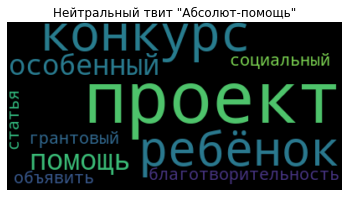

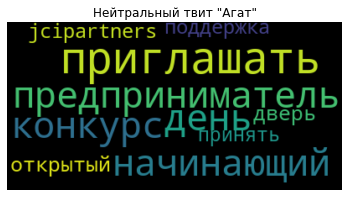

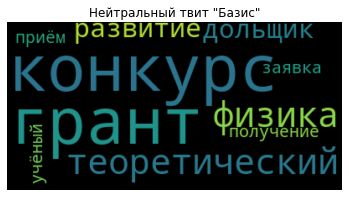

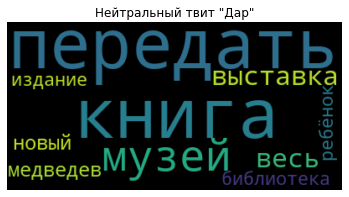

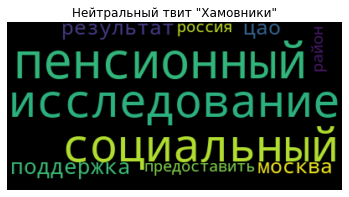

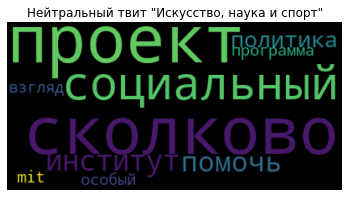

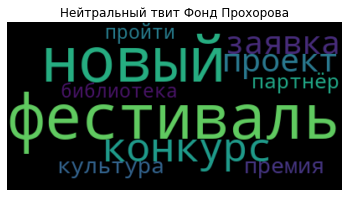

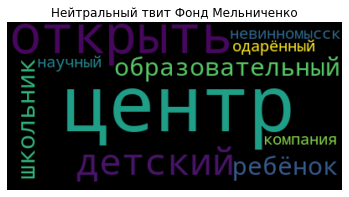

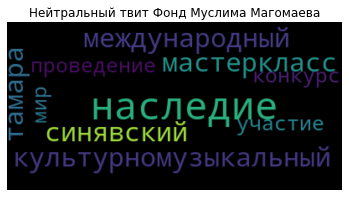

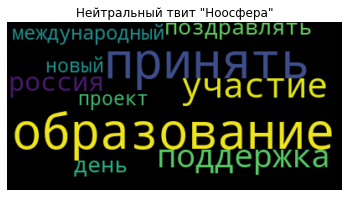

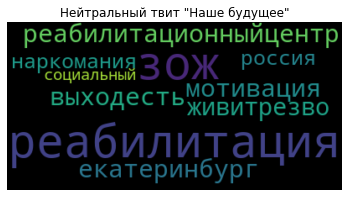

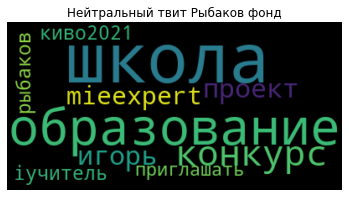

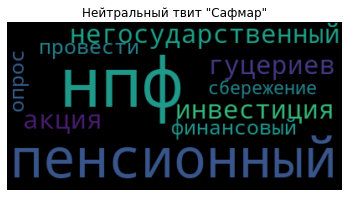

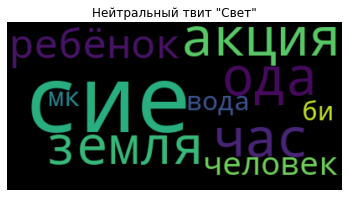

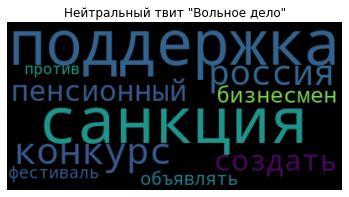

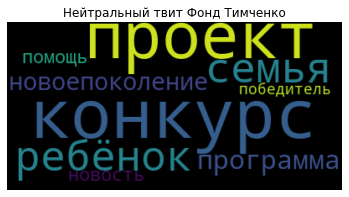

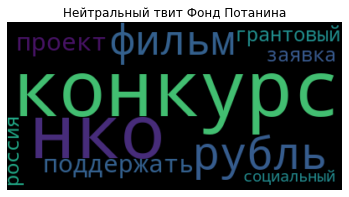

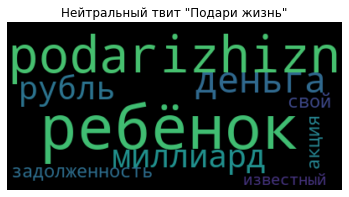

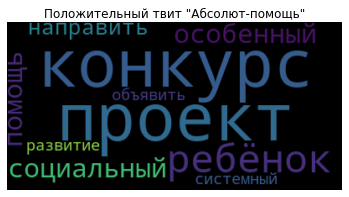

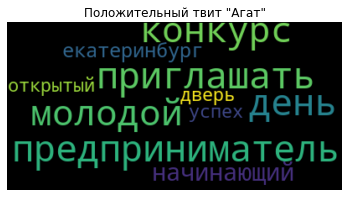

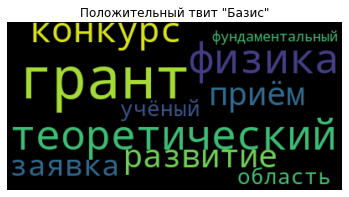

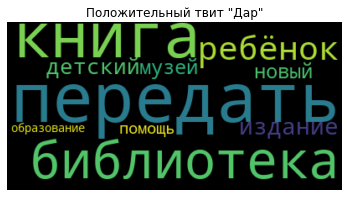

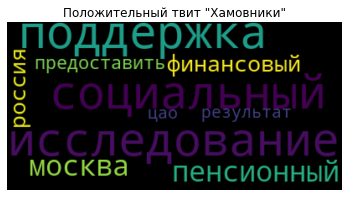

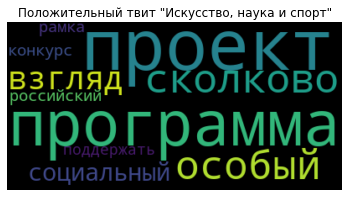

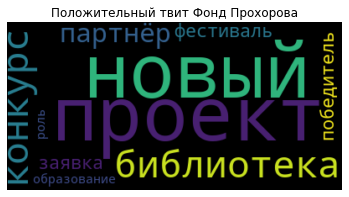

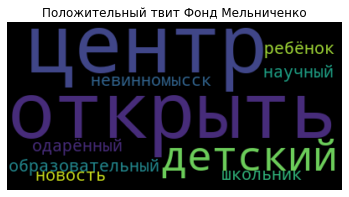

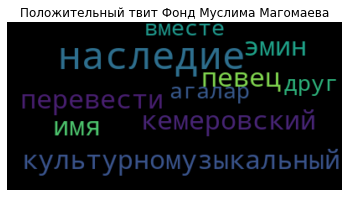

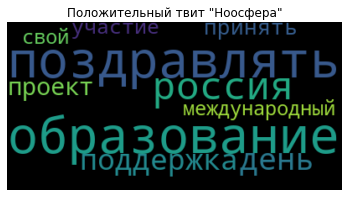

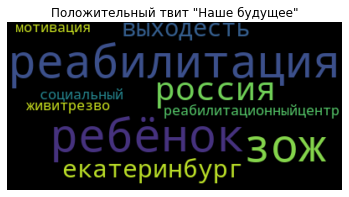

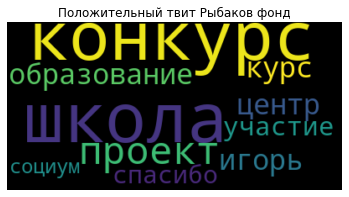

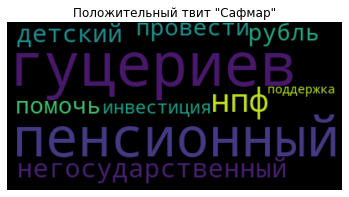

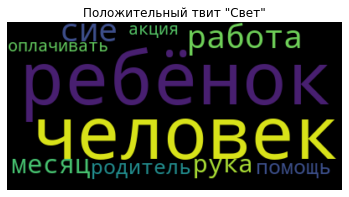

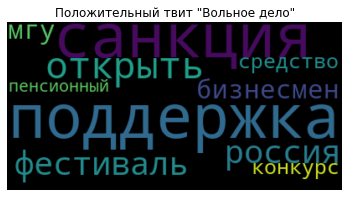

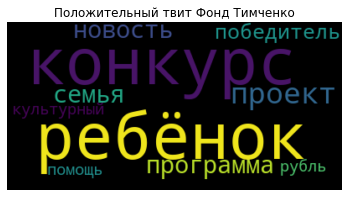

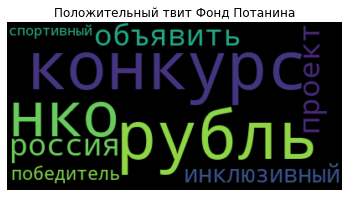

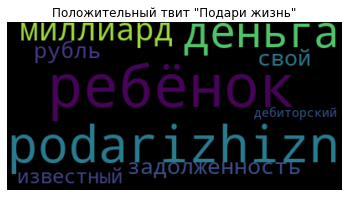

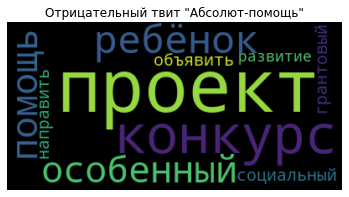

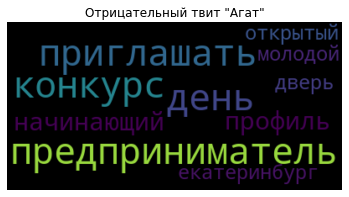

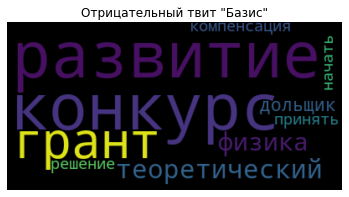

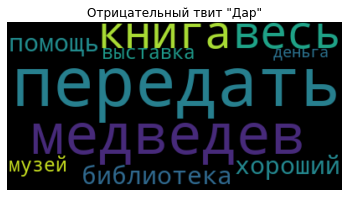

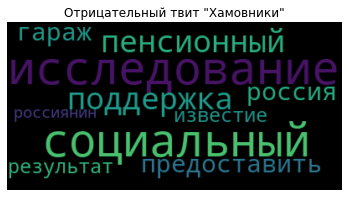

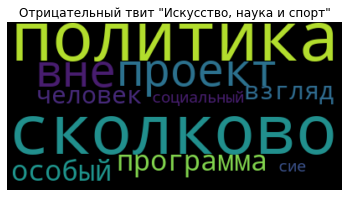

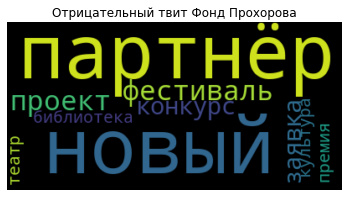

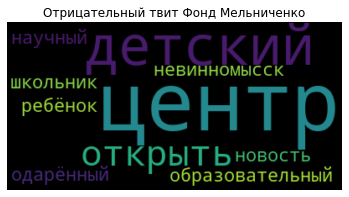

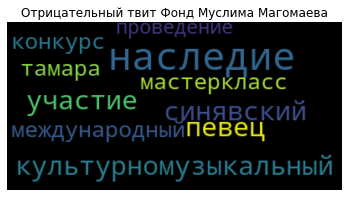

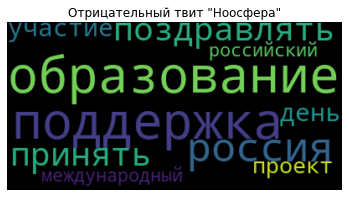

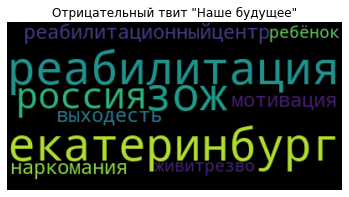

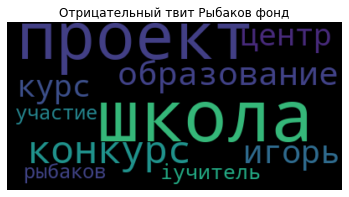

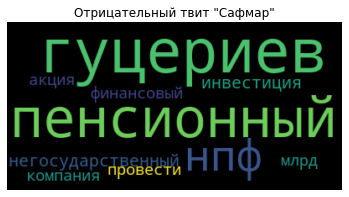

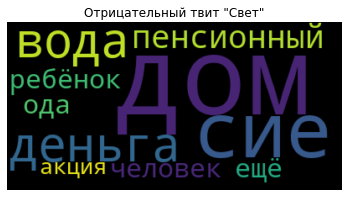

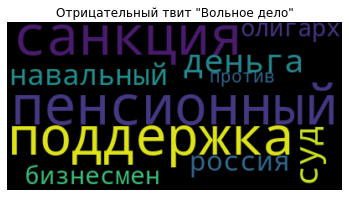

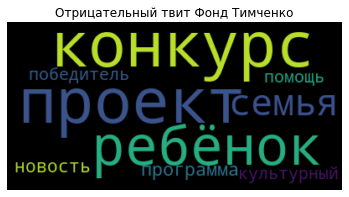

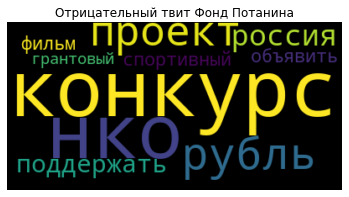

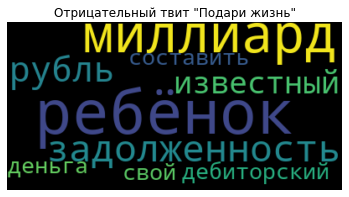

In [150]:
for r in fond_words_voc.keys():
  for i in fond_words_voc[r].keys():
    lst = []
    for j in most_words_by_fond[r][i]:
      lst.append(j[0])
    text_raw = " ".join(lst)
    wordcloud = WordCloud().generate(text_raw)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(r + ' ' + i)
    plt.axis("off")
    plt.show()